<a href="https://colab.research.google.com/github/tania011200/gdp-dashboard/blob/main/Proyecto_Progra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
!pip install biopython matplotlib

import os
import re
import matplotlib.pyplot as plt
from Bio import SeqIO

La secuencia transcription factor Sp1 isoform a [Homo sapiens].txt tiene un patrón de dedo de zinc.


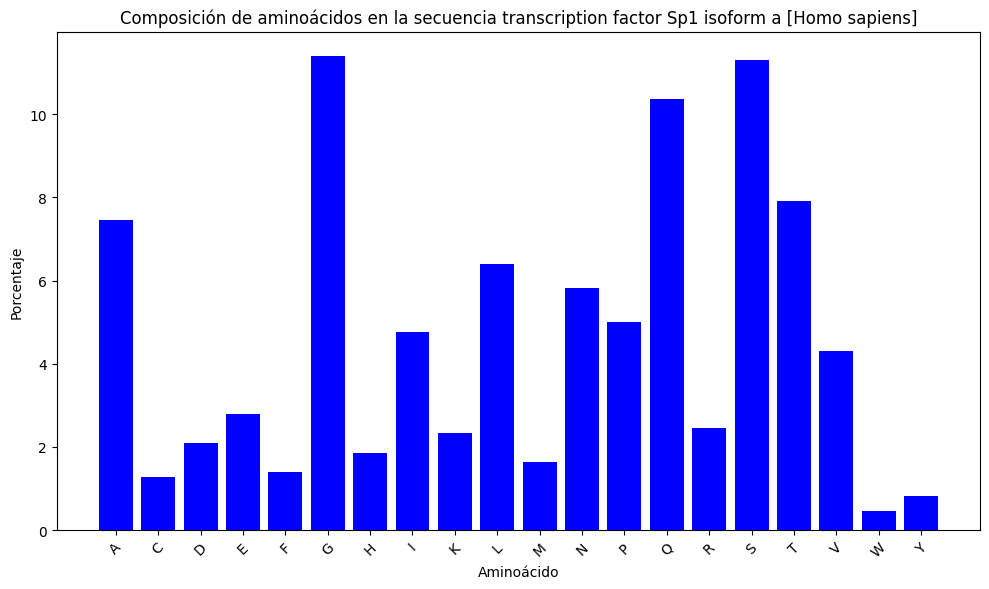

La secuencia EGR1 [Marmota monax].txt tiene un patrón de dedo de zinc.


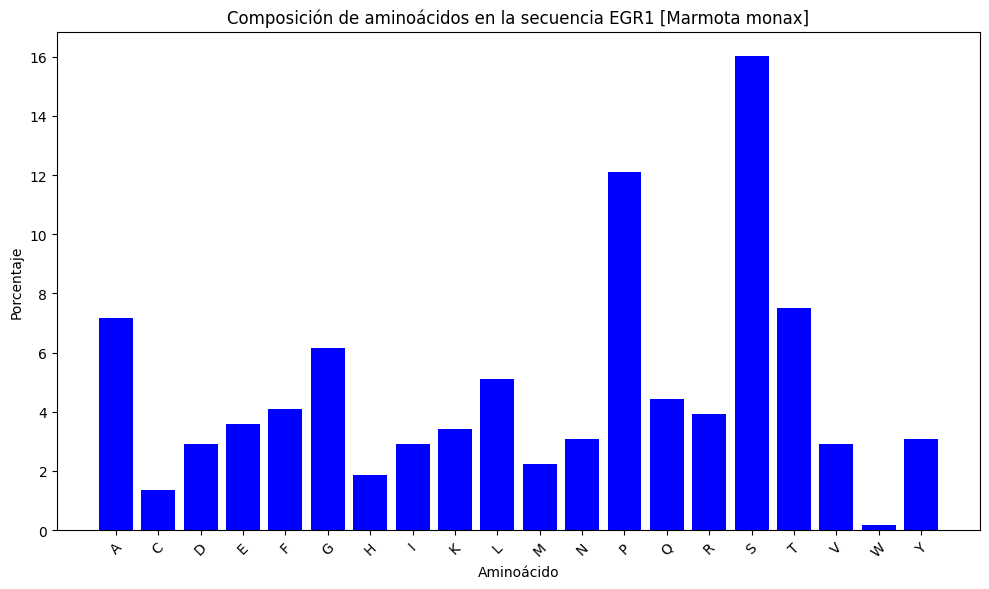

La secuencia KLF4 [Ovibos moschatus].txt tiene un patrón de dedo de zinc.


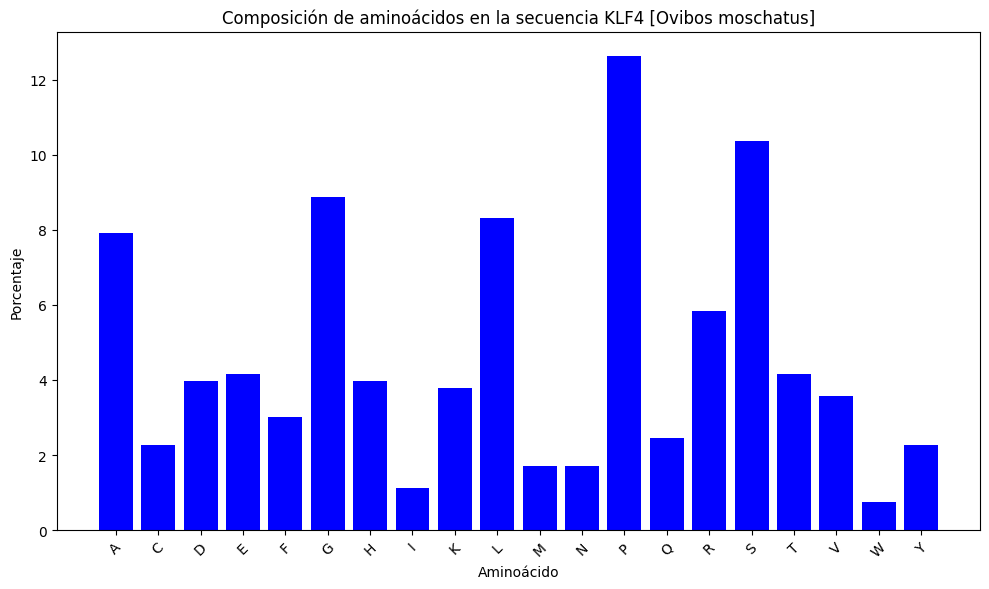

La secuencia actin, cytoplasmic 1 [Gallus gallus].txt NO tiene un patrón de dedo de zinc.


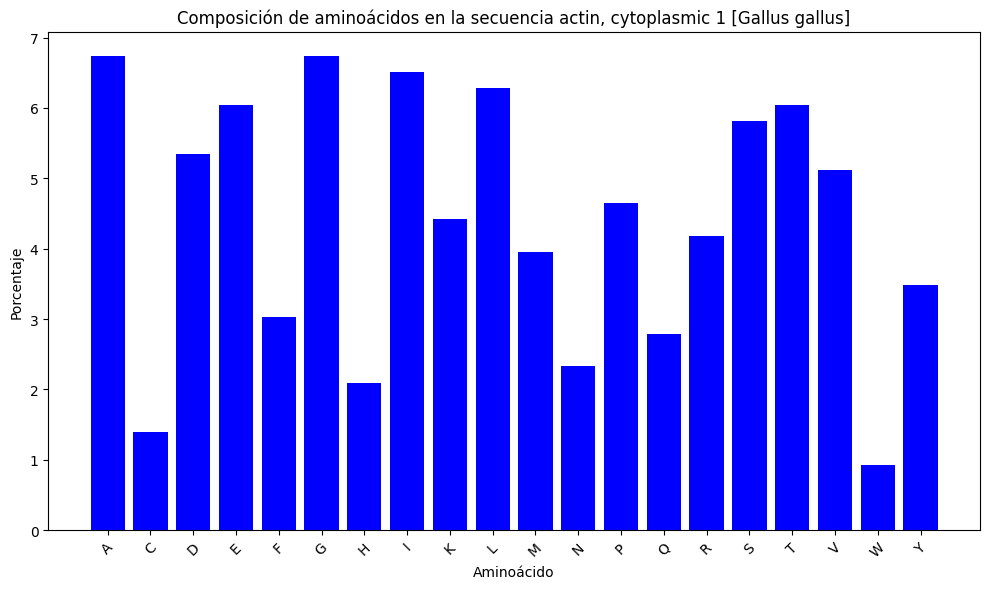

La secuencia actin 5C, isoform C [Drosophila melanogaster].txt NO tiene un patrón de dedo de zinc.


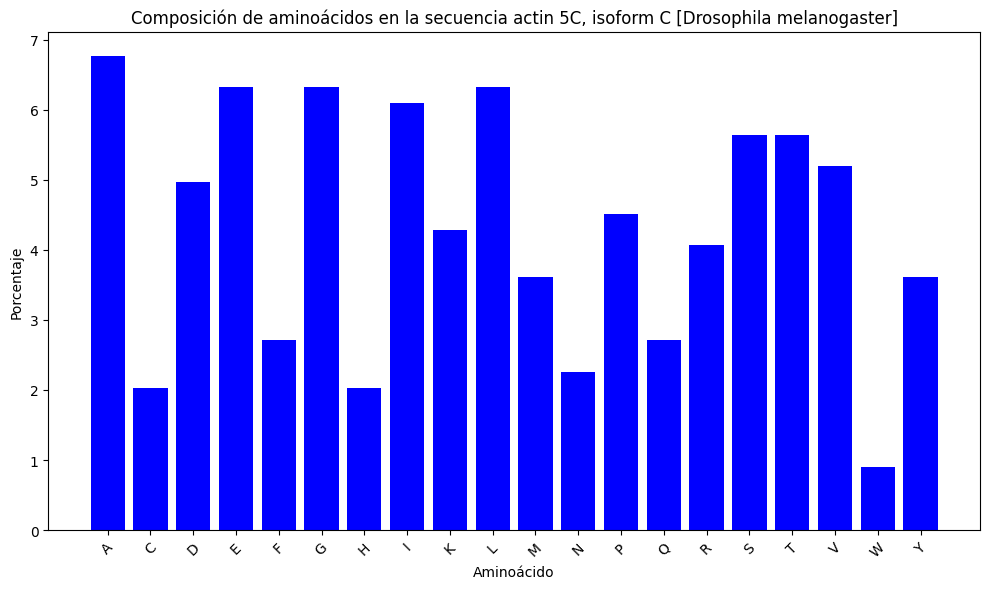

La secuencia beta-tubulin [Euplotes octocarinatus].txt NO tiene un patrón de dedo de zinc.


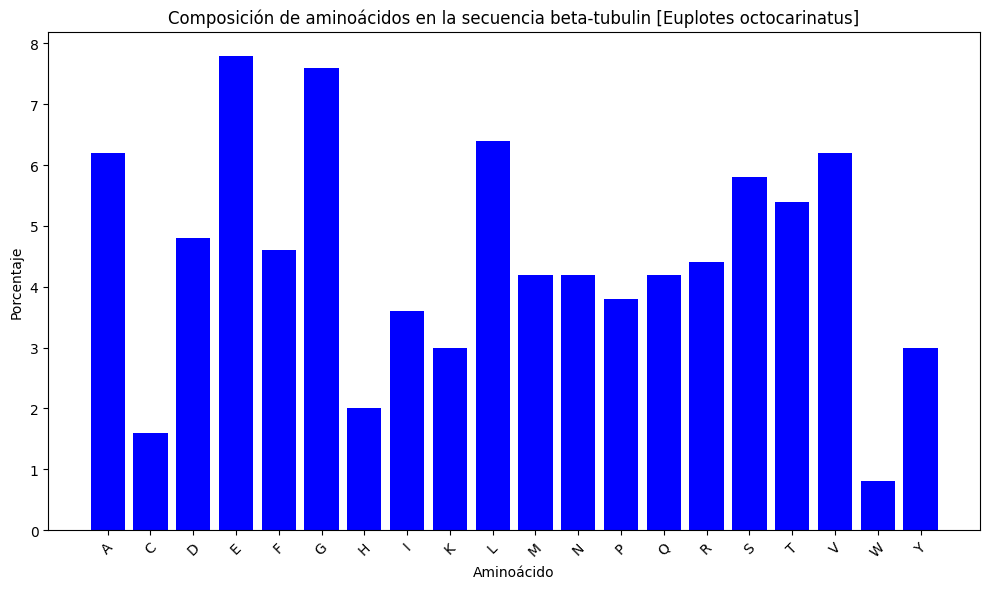

La secuencia beta-Tubulin at 60D, isoform B [Drosophila melanogaster].txt NO tiene un patrón de dedo de zinc.


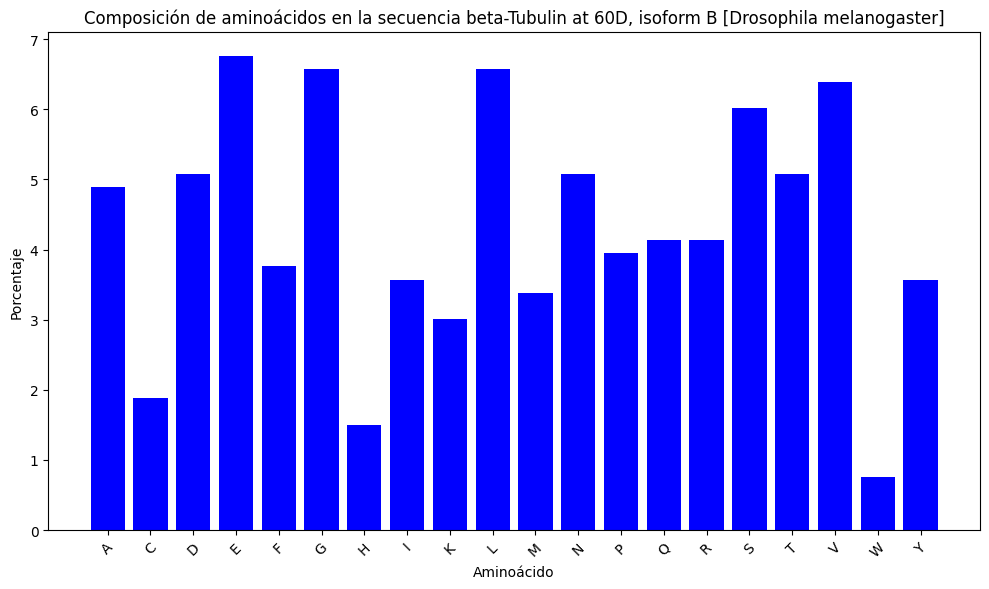

In [67]:
def has_zinc_finger(sequence):
    zinc_finger_pattern = "C.{2,4}C.{12}H.{3,5}H"
    return bool(re.search(zinc_finger_pattern, str(sequence)))

def calculate_amino_acid_composition(sequence):
    total_length = len(sequence)

    amino_acid_count = {aa: sequence.count(aa) for aa in "ACDEFGHIKLMNPQRSTVWY"}

    # Calcular porcentaje
    amino_acid_percentage = {aa: (count / total_length) * 100 for aa, count in amino_acid_count.items() if count > 0}

    return amino_acid_percentage

def import_sequences():
    sequences = {}
    txt_files = [
        "transcription factor Sp1 isoform a [Homo sapiens].txt",
        "EGR1 [Marmota monax].txt",
        "KLF4 [Ovibos moschatus].txt",
        "actin, cytoplasmic 1 [Gallus gallus].txt",
        "actin 5C, isoform C [Drosophila melanogaster].txt",
        "beta-tubulin [Euplotes octocarinatus].txt",
        "beta-Tubulin at 60D, isoform B [Drosophila melanogaster].txt"
    ]

    for file_name in txt_files:
        try:
            with open(file_name, "r") as file:
                sequence = file.read().strip()
                sequences[file_name] = sequence
        except FileNotFoundError:
            print(f"El archivo {file_name} no se encontró.")

    return sequences

def plot_amino_acid_composition(amino_acid_percentage, sequence_id):
    amino_acids = list(amino_acid_percentage.keys())
    percentages = list(amino_acid_percentage.values())

    plt.figure(figsize=(10, 6))
    plt.bar(amino_acids, percentages, color='blue')
    plt.xlabel('Aminoácido')
    plt.ylabel('Porcentaje')

    sequence_title = sequence_id.split('.')[0]
    plt.title(f'Composición de aminoácidos en la secuencia {sequence_title}')

    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

sequences = import_sequences()

for sequence_id, sequence in sequences.items():
    if has_zinc_finger(sequence):
        print(f"La secuencia {sequence_id} tiene un patrón de dedo de zinc.")
    else:
        print(f"La secuencia {sequence_id} NO tiene un patrón de dedo de zinc.")

    amino_acid_percentage = calculate_amino_acid_composition(sequence)
    plot_amino_acid_composition(amino_acid_percentage, sequence_id)